Задание 1: работа с цветовым пространством HSV.
На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

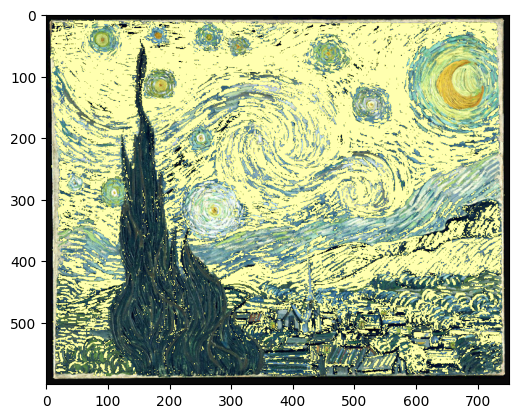

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_res = cv.imread('starry_night.jpg')

hsv_img = cv.cvtColor(img_res, cv.COLOR_BGR2HSV)

lower_blue = np.array([105, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv.inRange(hsv_img, lower_blue, upper_blue)

hsv_img[:, :, 2] = np.clip(hsv_img[:, :, 2].astype(np.int16) + 10, 10, 255).astype(np.uint8)

img_res = cv.cvtColor(hsv_img, cv.COLOR_HSV2RGB)

img_res = cv.cvtColor(img_res, cv.COLOR_RGB2RGBA)
img_res[mask != 0] = (255, 255, 0, 80)

plt.imshow(img_res)

Задание 2: На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

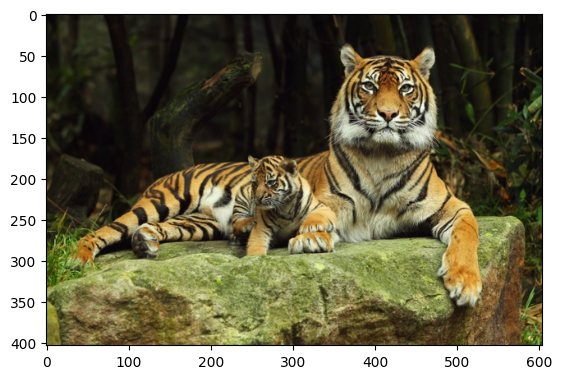

In [2]:
img = cv.imread('blur_img.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
kernel = np.ones((20, 20), np.float32) * 1/400
img_res = cv.filter2D(img, -1, kernel)

In [4]:
img_res = cv.blur(img, (5, 5))

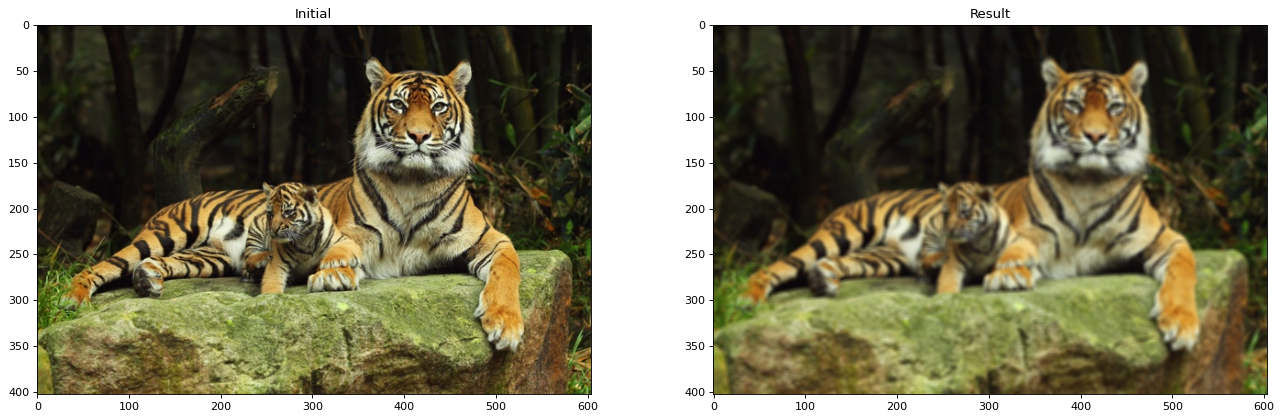

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Initial')
plt.subplot(122), plt.imshow(img_res, cmap="gray"), plt.title('Result')
plt.show()

In [6]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_result=cv.filter2D(img,-1,kernel)

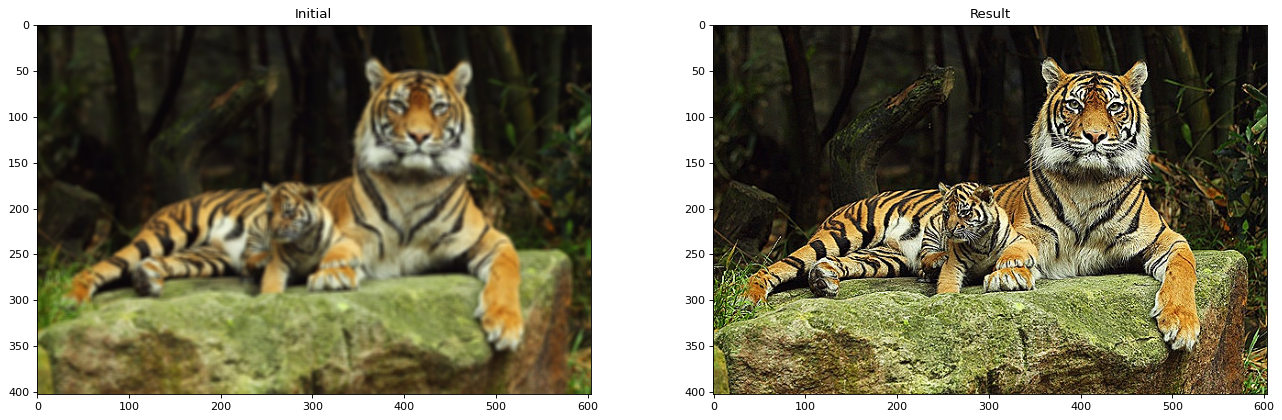

In [7]:
figure(figsize=(20, 6), dpi=80)
plt.subplot(121), plt.imshow(img_res, cmap="gray"), plt.title('Initial')
plt.subplot(122), plt.imshow(img_result, cmap="gray"), plt.title('Result')
plt.show()